<a href="https://colab.research.google.com/github/mdeepika12/AIML/blob/main/Clustering_Hierarchical_and_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [ ]:
df=pd.read_csv('product_segmentation_dataset.csv')

In [ ]:
# Encoding product warranty yes=1 & no=0
le=LabelEncoder()
df['Product Warranty']= le.fit_transform(df['Product Warranty'])

In [ ]:
df.head()

,Product Category,Price (USD),Average Customer Rating,Units Sold,Stock Level,Discount Offered (%),Product Warranty,Return Rate (%)
0,Desk,568.06,3.9,199,38,43.85,1,1.42
1,Bed,1332.68,4.4,185,41,47.20,1,6.26
2,Cabinet,1334.05,4.3,212,54,7.44,1,18.71
3,Desk,731.02,2.6,216,61,23.13,1,17.01
4,Sofa,752.33,3.7,205,104,49.05,1,19.64


In [ ]:
df.tail()

,Product Category,Price (USD),Average Customer Rating,Units Sold,Stock Level,Discount Offered (%),Product Warranty,Return Rate (%)
342,Sofa,720.82,1.9,203,103,11.10,0,6.14
343,Bed,1622.14,1.1,194,39,16.08,0,8.30
344,Bookshelf,412.53,3.6,183,58,42.40,1,14.26
345,Chair,1939.91,2.5,189,30,36.44,1,7.72
346,Bed,904.82,4.5,202,76,4.77,1,11.77


In [ ]:
# normalization
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df[['Average Customer Rating','Price (USD)','Units Sold','Stock Level','Discount Offered (%)','Product Warranty','Return Rate (%)']])


In [ ]:
df.isnull().sum()


,0
Product Category,0
Price (USD),0
Average Customer Rating,0
Units Sold,0
Stock Level,0
Discount Offered (%),0
Product Warranty,0
Return Rate (%),0


In [ ]:
#Clustering identifies segments such as high-performing and low-performing products
selected_features = ['Average Customer Rating','Price (USD)','Units Sold','Return Rate (%)'] # Changed to list of column names
df_selected = df[selected_features] # Select columns using a list of column names

# Step 2: Scale the selected features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

In [ ]:
cluster_new= KMeans(3)
cluster_new.fit(df_scaled)
df["cluster"]= cluster_new.labels_

In [ ]:
df['cluster'].value_counts()

,count
cluster,
0,137
1,108
2,102


In [ ]:
df.to_csv('cluster_product.csv')

In [ ]:
df[df.cluster==0]

,Product Category,Price (USD),Average Customer Rating,Units Sold,Stock Level,Discount Offered (%),Product Warranty,Return Rate (%),cluster
0,Desk,568.06,3.9,199,38,43.85,1,1.42,0
1,Bed,1332.68,4.4,185,41,47.20,1,6.26,0
6,Cabinet,344.31,2.2,199,25,43.18,1,4.95,0
7,Desk,355.68,4.6,181,12,29.44,1,3.26,0
15,Sofa,491.75,4.6,191,91,28.86,0,17.56,0
...,...,...,...,...,...,...,...,...,...
334,Cabinet,355.67,2.7,199,83,38.58,0,3.17,0
335,Cabinet,588.60,3.6,182,36,24.94,1,5.16,0
342,Sofa,720.82,1.9,203,103,11.10,0,6.14,0
344,Bookshelf,412.53,3.6,183,58,42.40,1,14.26,0


In [ ]:
df[df.cluster==1]

,Product Category,Price (USD),Average Customer Rating,Units Sold,Stock Level,Discount Offered (%),Product Warranty,Return Rate (%),cluster
2,Cabinet,1334.05,4.3,212,54,7.44,1,18.71,1
3,Desk,731.02,2.6,216,61,23.13,1,17.01,1
4,Sofa,752.33,3.7,205,104,49.05,1,19.64,1
5,Cabinet,1320.33,1.8,205,47,24.17,0,12.56,1
25,Chair,795.54,2.7,186,6,42.70,0,19.64,1
...,...,...,...,...,...,...,...,...,...
331,Chair,208.78,1.6,189,58,33.33,0,13.25,1
336,Sofa,451.03,2.6,196,11,0.61,0,12.11,1
337,Desk,2000.00,2.1,221,49,0.45,1,8.66,1
338,Chair,2000.00,4.9,202,32,17.85,0,15.49,1


In [ ]:
df[df.cluster==2]

,Product Category,Price (USD),Average Customer Rating,Units Sold,Stock Level,Discount Offered (%),Product Warranty,Return Rate (%),cluster
8,Table,617.23,1.1,197,48,18.77,0,3.74,2
9,Sofa,924.49,1.3,200,36,14.29,0,0.40,2
10,Desk,1406.31,1.8,203,110,10.16,1,7.81,2
11,Sofa,2000.00,1.1,213,103,38.09,0,3.83,2
12,Sofa,2000.00,1.7,198,18,19.33,0,8.23,2
...,...,...,...,...,...,...,...,...,...
330,Table,2000.00,4.8,189,120,32.03,0,7.73,2
339,Chair,2000.00,2.6,169,4,46.31,0,17.05,2
340,Sofa,1953.42,4.6,190,57,11.43,1,10.83,2
343,Bed,1622.14,1.1,194,39,16.08,0,8.30,2


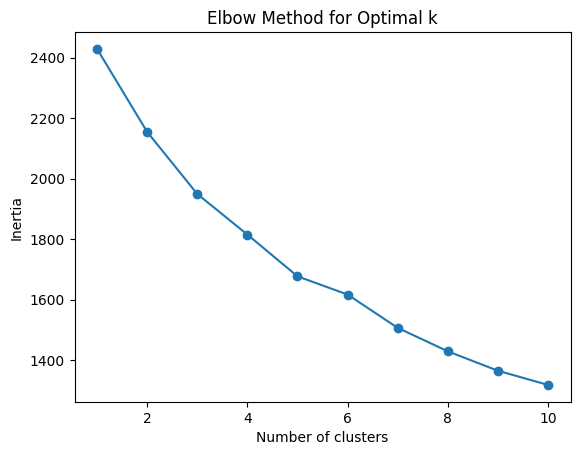

Cluster 0:
       Average Customer Rating  Price (USD)  Units Sold  Stock Level  \
count                85.000000    85.000000   85.000000    85.000000   
mean                  2.127059  1105.962000  197.717647    45.894118   
std                   0.748870   621.802621   13.794074    28.629831   
min                   1.100000   173.900000  169.000000     0.000000   
25%                   1.500000   598.800000  187.000000    24.000000   
50%                   1.900000   894.280000  199.000000    44.000000   
75%                   2.700000  1804.940000  207.000000    65.000000   
max                   3.900000  2000.000000  228.000000   103.000000   

       Discount Offered (%)  Product Warranty  Return Rate (%)  
count             85.000000              85.0        85.000000  
mean              26.187882               0.0        10.745294  
std               15.170559               0.0         5.441413  
min                0.610000               0.0         0.040000  
25%            

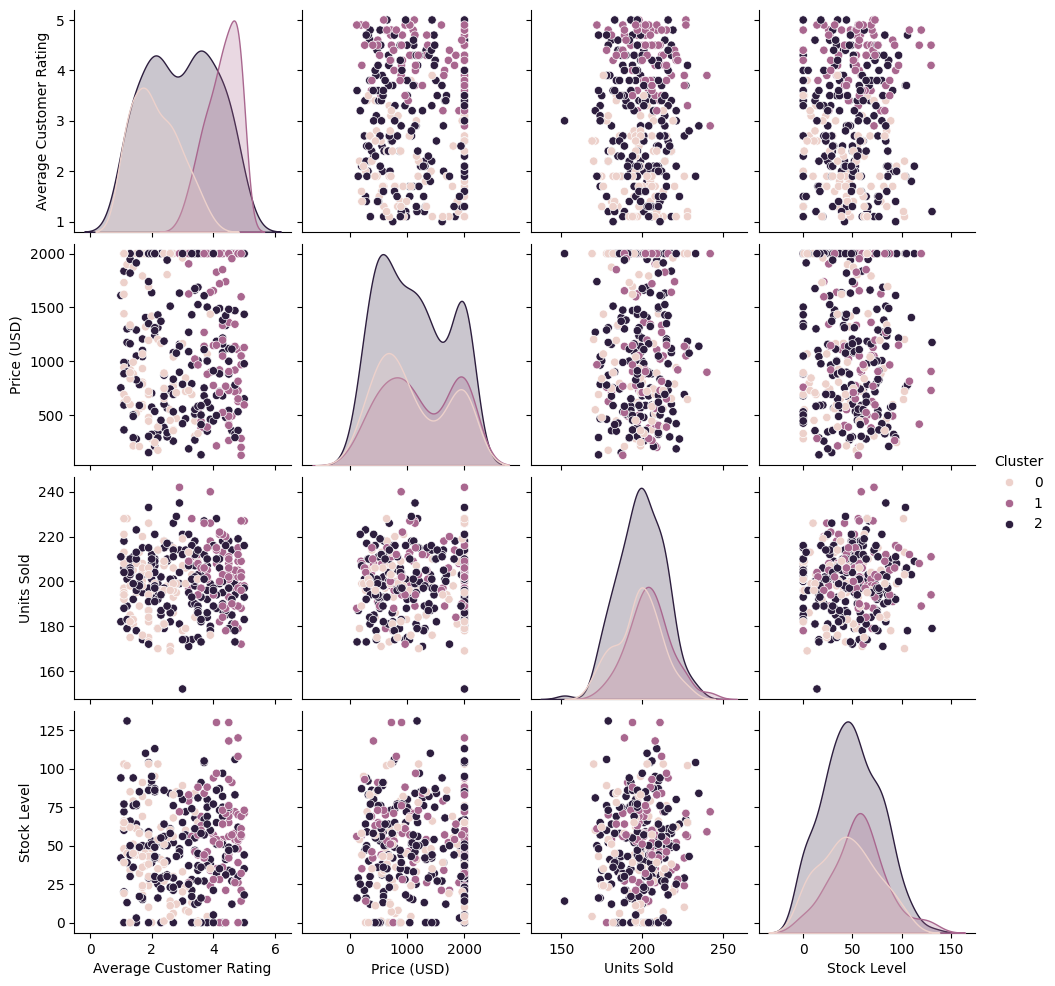

In [ ]:
# prompt: 1. How can FurniMart use clustering analysis to optimize its marketing spend and better
# target product segments? What data would be most relevant for this analysis?

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

warnings.filterwarnings('ignore')

# Load the dataset (assuming it's already uploaded to your Colab environment)
df = pd.read_csv('product_segmentation_dataset.csv')

# Feature Engineering (Example - can be expanded based on available data)
# Consider adding features like purchase frequency, customer demographics (age, location),
# marketing channel used for purchase, etc. if available in the dataset.
# Example of creating a new feature 'Price_per_unit'
# df['Price_per_unit'] = df['Price (USD)'] / df['Units Sold']

# Encoding categorical variables
le = LabelEncoder()
df['Product Warranty'] = le.fit_transform(df['Product Warranty'])


# Feature Scaling
scaler = StandardScaler()
# Select relevant features for clustering
# Include customer demographics, purchase history, and marketing interaction data if available
features_to_scale = ['Average Customer Rating', 'Price (USD)', 'Units Sold', 'Stock Level',
                     'Discount Offered (%)', 'Product Warranty', 'Return Rate (%)']  # Example features
df_scaled = scaler.fit_transform(df[features_to_scale])


# Determine Optimal Number of Clusters (e.g., using the Elbow method)
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


# Apply K-Means Clustering (using the optimal k determined above)
optimal_k = 3  # Replace with the optimal k value from the Elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Analyze Clusters and Target Marketing
# Example: Analyze the characteristics of each cluster
for cluster in range(optimal_k):
    print(f"Cluster {cluster}:")
    print(df[df['Cluster'] == cluster][features_to_scale].describe())  # Statistical summary
    print("\n")


# Visualize Clusters (Example: Pairplot)
sns.pairplot(df, hue='Cluster', vars=features_to_scale[:4], diag_kind='kde')  # Pairplot of the first four scaled features
plt.show()

# Marketing Optimization Strategies
# Based on the cluster characteristics:
# Cluster 0: High-value customers (e.g., high average rating, high spending, low return rate)
# Target them with premium products, exclusive offers, loyalty programs.
# Cluster 1: Price-sensitive customers
# Target them with discounts, promotions, value bundles.
# Cluster 2: Customers with specific needs (e.g., high return rate, specific product preferences)
# Tailor marketing messages and product recommendations accordingly.

# Save the DataFrame with cluster assignments
df.to_csv('clustered_products.csv', index=False)

In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

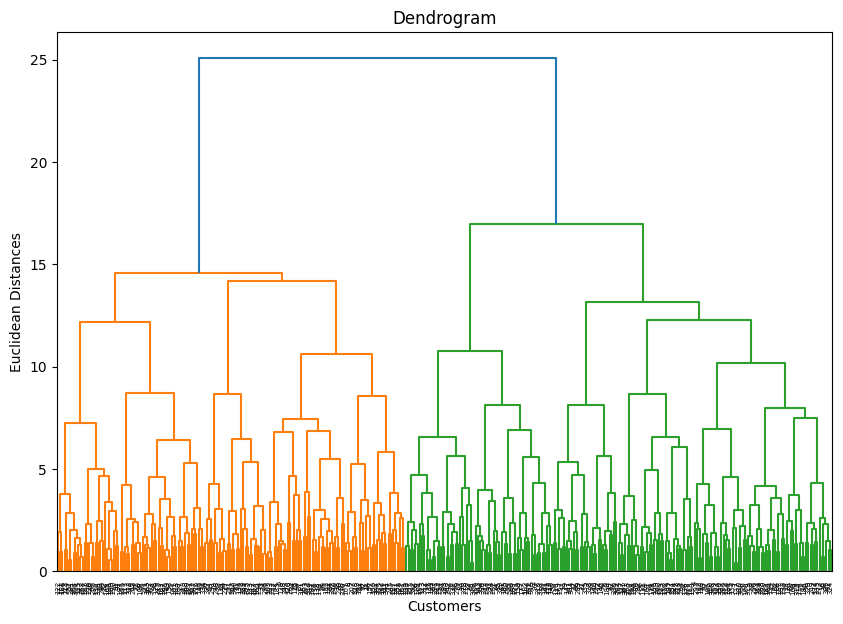

In [ ]:
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distances")
plt.show()

In [ ]:
hc = AgglomerativeClustering(n_clusters=4, linkage='ward')
df['Cluster_HC'] = hc.fit_predict(df_scaled)


In [ ]:
df.head()

,Product Category,Price (USD),Average Customer Rating,Units Sold,Stock Level,Discount Offered (%),Product Warranty,Return Rate (%),Cluster,Cluster_HC
0,Desk,568.06,3.9,199,38,43.85,1,1.42,2,1
1,Bed,1332.68,4.4,185,41,47.20,1,6.26,2,1
2,Cabinet,1334.05,4.3,212,54,7.44,1,18.71,1,2
3,Desk,731.02,2.6,216,61,23.13,1,17.01,2,1
4,Sofa,752.33,3.7,205,104,49.05,1,19.64,2,1


**Question 1: How can clustering analysis help FurniMart optimize its marketing spend?**  
Clustering analysis allows FurniMart to enhance its marketing efficiency by categorizing products based on shared traits like pricing, customer reviews, sales performance, and return rates. These clusters enable the company to tailor its marketing strategies to different groups. For example, high-end products with excellent customer feedback and minimal return rates can be promoted to premium customers, while affordable products can target budget-conscious buyers with special discounts. Clustering also helps identify underperforming items, which can then be addressed through quality improvements or revised marketing efforts. By adopting this targeted approach, FurniMart can use its marketing budget more effectively, leading to a better return on investment and improved customer satisfaction.

**Question 2: What kind of data would be required for effective clustering analysis for FurniMart?**  
To conduct meaningful clustering analysis, FurniMart would need detailed data such as product prices, average customer ratings, sales figures, and return rates. Additional valuable data might include details on promotional campaigns, customer demographics, purchase habits, and competitors' pricing strategies. Supplementary information like feedback from buyers, warranty claims, and stock availability would further enrich the analysis. Collectively, these data points help uncover patterns and trends, empowering FurniMart to create marketing and operational strategies informed by data.

**Question 3: Why is clustering analysis important for FurniMart?**  
Clustering analysis is vital for FurniMart as it facilitates precise resource allocation and enhanced customer engagement. By identifying trends in product demand and customer preferences, FurniMart can focus on lucrative segments while addressing shortcomings in underperforming ones. It also supports effective inventory management by aligning stock levels with consumer demand. Moreover, clustering analysis aids in creating targeted marketing campaigns that resonate with specific customer groups. It provides a competitive edge by allowing FurniMart to anticipate and adapt to market shifts, ensuring operational efficiency and a customer-centric approach.

**Question 4: What strategies can FurniMart implement based on clustering results?**  
FurniMart can implement various strategies derived from clustering insights. For high-value customers, it can introduce premium services like loyalty rewards or exclusive discounts. Price-sensitive segments can be targeted with bundled deals or seasonal offers. Products with high return rates can be improved by refining their descriptions, enhancing quality, or offering better post-purchase support. Clustering may also highlight regional or seasonal trends, enabling geographically targeted or time-specific marketing campaigns. Additionally, these insights can inform product development efforts, focusing on attributes most valued by profitable customer segments.

**Question 5: What are the limitations of clustering analysis, and how can FurniMart address them?**  
Clustering analysis comes with certain limitations, such as reliance on accurate and complete data, as missing or biased data can skew results. The selection of features for clustering can also be subjective, affecting the insights generated. Furthermore, clustering provides a snapshot in time, which may not fully capture evolving customer behavior. Interpreting overlapping clusters can be complex, and excessive segmentation might result in overly granular groups that are challenging to act on. Large datasets may also present scalability challenges. FurniMart can overcome these issues by ensuring accurate and comprehensive data collection, regularly refreshing clustering models, and integrating predictive analytics to adapt to shifting market dynamics.